<h1><center>Solving for Happiness - Exploratory Data Analysis</center></h1>

In [1]:
# import libraries to be used throughout project
import pandas as pd
import numpy as np
import matplotlib 
import math
from matplotlib import pylab as plt
import seaborn as sns

In [2]:
# import lagged dataset for analysis
df = pd.read_csv('../data/happiness_lagged3.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)

df.head(16)

,Country,Target Year,Target Score,Population lag 3 years,Population lag 2 years,Population lag 1 year,Population Current,Life Ex lag 3 years,Life Ex lag 2 years,Life Ex lag 1 year,...,GDP_cap lag 2 years,GDP_cap lag 1 year,GDP_cap Current,CO2 lag 3 years,CO2 lag 2 years,CO2 lag 1 year,CO2 Current,Happy lag 3 years,Happy lag 2 years,Happy lag 1 year
0,Argentina,2005,6.073158,NaN,NaN,NaN,38892924.0,NaN,NaN,NaN,...,NaN,NaN,5109.852245,NaN,NaN,NaN,5.690960e+09,NaN,NaN,NaN
1,Argentina,2006,5.961034,NaN,NaN,38892924.0,39289876.0,NaN,NaN,74.1,...,NaN,5109.852245,5919.012338,NaN,NaN,5.690960e+09,5.865569e+09,NaN,NaN,6.073158
2,Argentina,2007,6.424133,NaN,38892924.0,39289876.0,39684303.0,NaN,74.1,74.0,...,5109.852245,5919.012338,7245.446857,NaN,5.690960e+09,5.865569e+09,6.039814e+09,NaN,6.073158,5.961034
3,Argentina,2008,6.441067,38892924.0,39289876.0,39684303.0,40080159.0,74.1,74.0,74.1,...,5919.012338,7245.446857,9020.873323,5.690960e+09,5.865569e+09,6.039814e+09,6.227920e+09,6.073158,5.961034,6.424133
4,Argentina,2009,6.775805,39289876.0,39684303.0,40080159.0,40482786.0,74.0,74.1,74.1,...,7245.446857,9020.873323,8225.137583,5.865569e+09,6.039814e+09,6.227920e+09,6.406870e+09,5.961034,6.424133,6.441067
5,Argentina,2010,6.468387,39684303.0,40080159.0,40482786.0,40895751.0,74.1,74.1,74.7,...,9020.873323,8225.137583,10385.964430,6.039814e+09,6.227920e+09,6.406870e+09,6.593603e+09,6.424133,6.441067,6.775805
6,Argentina,2011,6.582260,40080159.0,40482786.0,40895751.0,41320497.0,74.1,74.7,74.9,...,8225.137583,10385.964430,12848.864200,6.227920e+09,6.406870e+09,6.593603e+09,6.783877e+09,6.441067,6.775805,6.468387
7,Argentina,2012,6.671114,40482786.0,40895751.0,41320497.0,41755188.0,74.7,74.9,75.2,...,10385.964430,12848.864200,13082.664330,6.406870e+09,6.593603e+09,6.783877e+09,6.975591e+09,6.775805,6.468387,6.582260
8,Argentina,2013,6.697131,40895751.0,41320497.0,41755188.0,42196034.0,74.9,75.2,74.8,...,12848.864200,13082.664330,13080.254730,6.593603e+09,6.783877e+09,6.975591e+09,7.165725e+09,6.468387,6.582260,6.671114
9,Argentina,2014,6.427221,41320497.0,41755188.0,42196034.0,42637508.0,75.2,74.8,75.4,...,13082.664330,13080.254730,12334.798250,6.783877e+09,6.975591e+09,7.165725e+09,7.354382e+09,6.582260,6.671114,6.697131


<h2>Exploratory Data Analysis</h2>

Perform early data analysis to better understand the distribution of the dataset, as well as the target variable. This step will inform our process for splitting and preprocessing the data.

In [3]:
print('Number of datapoints in dataset:',df.shape[0])
print('Number of features in dataset:',df.shape[1])

Number of datapoints in dataset: 752
Number of features in dataset: 26


In [4]:
# list datatypes for each feature
with pd.option_context('display.max_rows',None):
    print(df.dtypes)

Country                    object
Target Year                 int64
Target Score              float64
Population lag 3 years    float64
Population lag 2 years    float64
Population lag 1 year     float64
Population Current        float64
Life Ex lag 3 years       float64
Life Ex lag 2 years       float64
Life Ex lag 1 year        float64
Life Ex Current           float64
GDP lag 3 years           float64
GDP lag 2 years           float64
GDP lag 1 year            float64
GDP Current               float64
GDP_cap lag 3 years       float64
GDP_cap lag 2 years       float64
GDP_cap lag 1 year        float64
GDP_cap Current           float64
CO2 lag 3 years           float64
CO2 lag 2 years           float64
CO2 lag 1 year            float64
CO2 Current               float64
Happy lag 3 years         float64
Happy lag 2 years         float64
Happy lag 1 year          float64
dtype: object


In [5]:
# Explore target variable
y = df['Target Score']

print('Target data type:',y.dtypes)

# Each score is unique (752 total)
y.describe()

Target data type: float64


count    752.000000
mean       5.670480
std        1.044488
min        2.693523
25%        4.917131
50%        5.766838
75%        6.433014
max        7.970892
Name: Target Score, dtype: float64

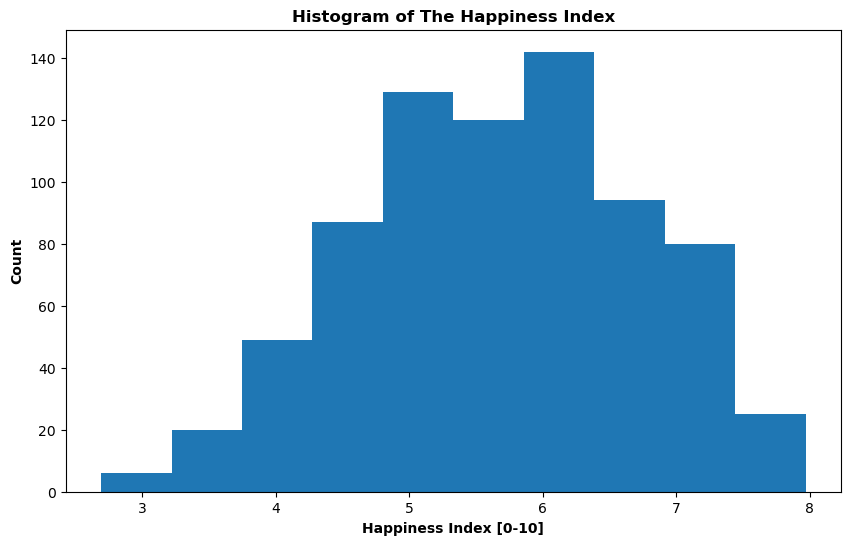

In [6]:
plt.figure(figsize=(10,6))

# create histogram for target 
y.hist(xlabelsize=10,grid=False,bins=10)

# label and show 
plt.xlabel('Happiness Index [0-10]', weight='bold')
plt.ylabel('Count',weight='bold')
plt.title('Histogram of The Happiness Index', weight='bold')
plt.savefig(fname='../figures/happiness_histogram',format='png',dpi=300)
plt.show()

**Histogram of the Happiness Index:** The histogram of the target variable is relatively normally distributed, meaning that there is not a skew or obvious outliers for the happiness distribution across countries. The mean of the target is 5.67, which is approximately our expected value for a score that ranges from 0-10. This distribution confirms that a stratified split is not necessary for our model, as the target is evenly distributed. 

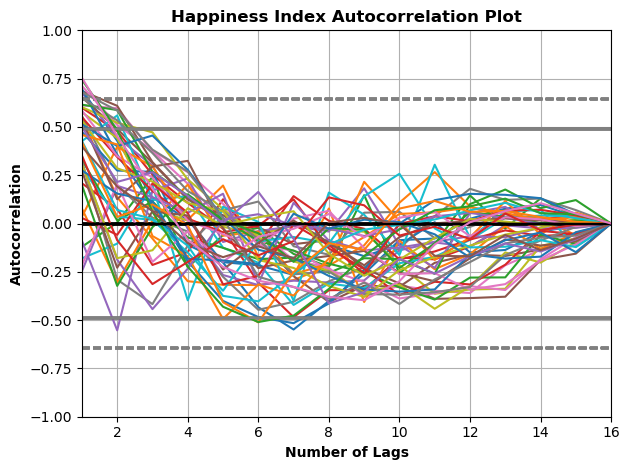

In [89]:
# plot the auotcorrelation of the happiness index overtime 
countries = df['Country'].unique()

for c in countries:
    
    hc = df.loc[df['Country']==c,df.columns=='Target Score']
    pd.plotting.autocorrelation_plot(hc)

# label and show the plot
plt.title("Happiness Index Autocorrelation Plot", weight='bold')
plt.tight_layout()

# plt.xticks([1,2,3,4,5])
# plt.xlim([1,5])
plt.xlabel('Number of Lags',weight='bold')
plt.ylabel('Autocorrelation',weight='bold')
plt.savefig(fname='../figures/happiness_autocorr',format='png',dpi=300)

plt.show()


**Autocorrelation Plot of the Happiness Index:** The above plot shows the autocorrelation of the happiness index for all 47 countries over the 16 years of lag. This plot shows that, despite the differences in countries' wealth, population, and CO2 emissions, happiness amoung people of the world follows a similar correlation. This may tell us that happiness is an innate human feature, and doesn't conform to political boundries.

<div class="alert alert-block alert-info">
    <b>Takeaway:</b> The target variable is a numeric value and therefore this project will consist of a regression analysis. The distribution of the target variable has a slight rightward skew, but is fairly normally distributed. As a result, stratification will not be needed when splitting.
  </div>

<h2> Feature Data Exploration </h2>

**Gross Domestic Product (GDP) and GDP-per-capita**

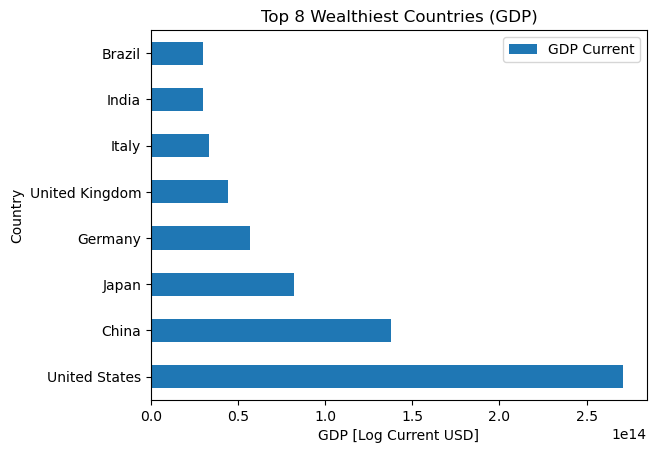

,GDP Current
count,4.700000e+01
mean,1.893112e+13
std,4.512397e+13
min,9.739970e+10
25%,5.757365e+11
50%,3.820954e+12
75%,1.960385e+13
max,2.710478e+14


In [8]:
# Population of each country in 2020
gdp = df[['Country','GDP Current']].groupby(['Country']).sum().sort_values(by=['GDP Current'],ascending=False)

# plot bar chart of top 8 countries
gdp.head(8).plot.barh()


# label and show the plot
plt.xlabel('GDP [Log Current USD]')
plt.ylabel('Country')
plt.title('Top 8 Wealthiest Countries (GDP)')
plt.savefig(fname='../figures/GDP_histogram',format='png')
plt.show()

gdp.describe()

**Barplot of GDP:** The barplot above shows a comparison of the top 8 wealthiest countries. The graph clearly illustrates that large discrepancies between various countries' wealth, as the United States has a significant advantage in GDP over the next 7 countries. The large standard deviation of GDP also illustrates the significant differences in wealth across countries.

<div class="alert alert-block alert-info">
    <b>Takeaway:</b> The GDP feature is heavily skewed, indictating that the distribution of world wealth between countries is fairly uneven. The maximum and minimum values of GDP are seperated by a factor of 4.
  </div>

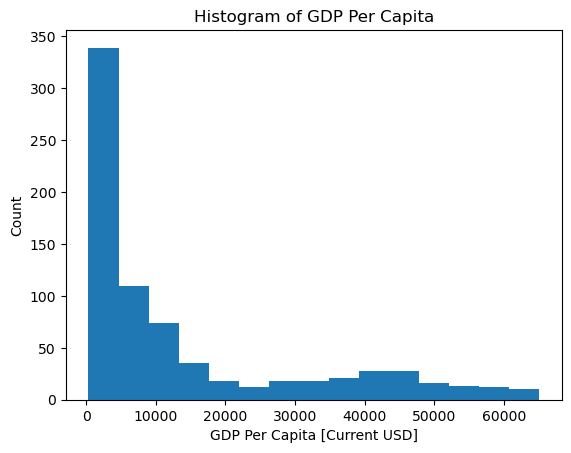

count      752.000000
mean     14055.227958
std      16963.304879
min        333.731576
25%       1998.201037
50%       6117.428732
75%      19213.181303
max      65094.799430
Name: GDP_cap Current, dtype: float64

In [9]:
gdp_cap = df['GDP_cap Current']

# plot histogram of GDP
gdp_cap.hist(bins=15,grid=False)

# label and show 
plt.xlabel('GDP Per Capita [Current USD]')
plt.ylabel('Count')
plt.title('Histogram of GDP Per Capita')
plt.savefig(fname='../figures/GDP_per_capita_histogram',format='png')
plt.show()


# explore numeric qualities of GDP feature
gdp_cap.describe()

**Histogram of GDP-per-capita:** The GDP-per-capita feature is heavily leftward skewed, indictating that the distribution of world wealth for individuals is fairly uneven. The maximum and minimum values of GDP-per-capita are seperated by tens of thousands of dollars.

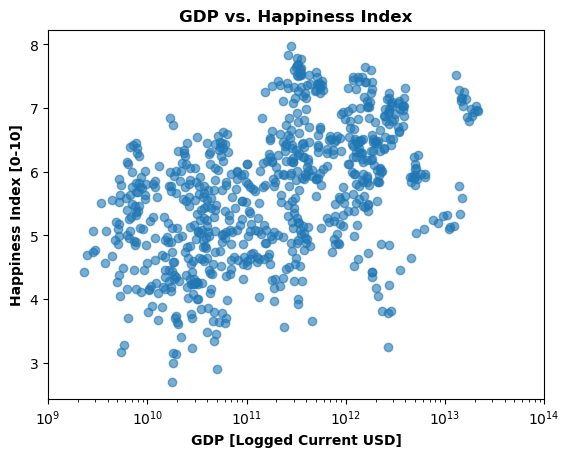

In [10]:
# create axis for logged scatter of GDP
ax = plt.gca()

# create scatter plot and ticks
ax.scatter(df['GDP Current'],df['Target Score'],alpha=.6)
ax.set_xscale('log')
ax.set_xticks([math.pow(10,9),math.pow(10,10),math.pow(10,11),math.pow(10,12),math.pow(10,13),math.pow(10,14)])
# plt.xlim(math.pow(10,9.3),math.pow(10,13.6))

# label and show the plot
plt.xlabel('GDP [Logged Current USD]',weight='bold')
plt.ylabel('Happiness Index [0-10]',weight='bold')
plt.title('GDP vs. Happiness Index',weight='bold')
plt.savefig(fname='../figures/GDP_vs_happiness_scatter',format='png',dpi=300)
plt.show()

**Scatterplot of GDP v. Happiness Index:** The scatter plot above demonstrates the positive correlation between GDP and the happiness index, illustrating how wealthier countries tend to have happier citizens. However, the scatter plot is relatively loosely fitted to this trend line, meaning that this pattern may vary significantly across countries, and GDP does not completely explain the variance in happiness across countries.

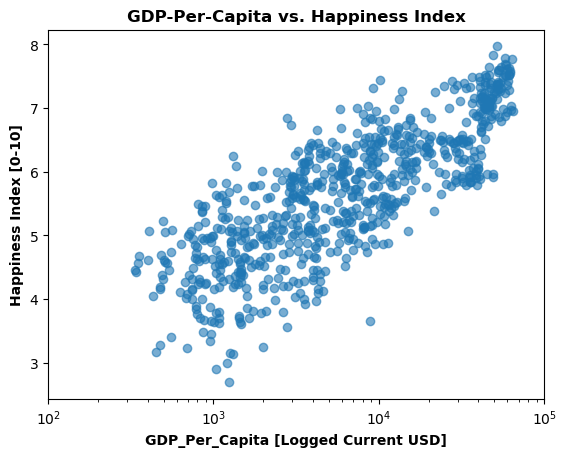

In [11]:
# create axis for logged scatter of GDP_per_capita
ax = plt.gca()

# create scatter plot and ticks
ax.scatter(df['GDP_cap Current'],df['Target Score'],alpha=.6)
ax.set_xscale('log')
ax.set_xticks([math.pow(10,2),math.pow(10,3),math.pow(10,4),math.pow(10,5)])
plt.xlim(math.pow(10,2),math.pow(10,5))

# label and show the plot
plt.xlabel('GDP_Per_Capita [Logged Current USD]',weight='bold')
plt.ylabel('Happiness Index [0-10]',weight='bold')
plt.title('GDP-Per-Capita vs. Happiness Index',weight='bold')
plt.savefig(fname='../figures/GDP_per_capita_vs_happiness_scatter',format='png',dpi=300)
plt.show()

**Scatterplot of GDP-per-capita v. the Happiness Index:** The scatter plot above demonstrates the positive correlation between GDP-per-capita and the happiness index, illustrating how wealthier countries tend to have happier citizens. The scatter plot is strongly fitted to this trend, telling us that the GDP-per-capita of a country explains a significant amount of the variation in the happiness index. 

<div class="alert alert-block alert-info">
    <b>Takeaway:</b> Both GDP and GDP-per-capita have a positive correlation with the Happiness Index, indicating that wealthier countries tend to have higher qualities of life. However, the GDP-per-capita plot displays a more convincing positive correlation with the target variable. This may tell us that how the wealth of a country is distributed is a better indicator of the citizen's happiness.
  </div>

**CO2 Emissions (Tons)**

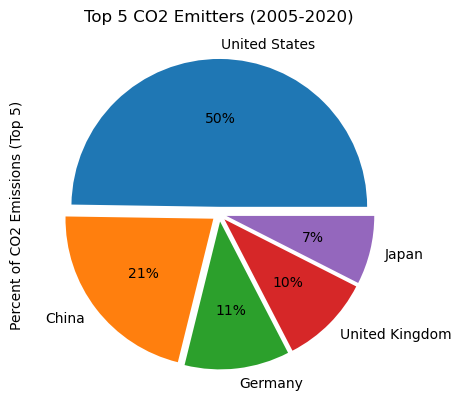

In [12]:
# create dataframe of countries and their co2 emissions 
df_co2 = df[['Country','CO2 Current']].groupby(['Country']).sum().sort_values(by=['CO2 Current'],ascending=False)

# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

# plot pie chart of the top 5 emittors 
df_co2.head(5).plot(kind='pie',y='CO2 Current',autopct='%1.0f%%',legend=False,explode=explode)

# label and show the plot
plt.title('Top 5 CO2 Emitters (2005-2020)')
plt.savefig(fname='../figures/co2_piechart',format='png')
plt.ylabel('Percent of CO2 Emissions (Top 5)')
plt.show()

**Pie Chart of Top CO2 Emittors:** The pie chart above shows the share of CO2 emissions for each of the top emittors in 2020. The chart illustrates that the United States accounts for the majority of emissions for a single country, while China emits the second most. This is consistent with our analysis of the largest countries by GDP, indicating that wealthier countries also tend to produce more CO2. 

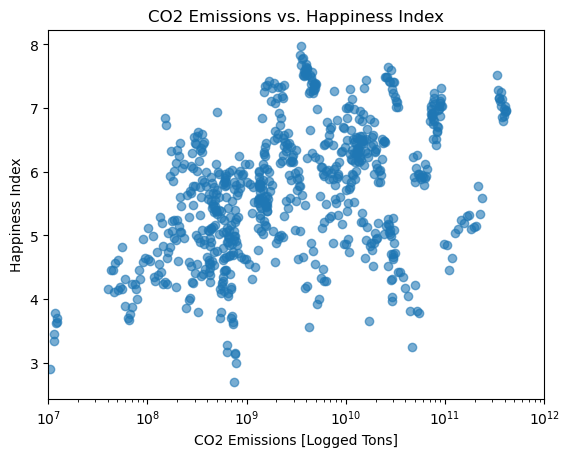

In [13]:
# create axis for logged scatter of GDP_per_capita
ax = plt.gca()

# create scatter plot and ticks
ax.scatter(df['CO2 Current'],df['Target Score'],alpha=.6)
ax.set_xscale('log')
ax.set_xticks([math.pow(10,7),math.pow(10,8),math.pow(10,9),math.pow(10,10),math.pow(10,11),math.pow(10,12)])
plt.xlim(math.pow(10,7),math.pow(10,12))

# label and show the plot
plt.xlabel('CO2 Emissions [Logged Tons]')
plt.ylabel('Happiness Index')
plt.title('CO2 Emissions vs. Happiness Index')
plt.savefig(fname='../figures/co2_vs_happiness_scatter',format='png')
plt.show()

In [14]:
df_co2.describe()

,CO2 Current
count,4.700000e+01
mean,3.449834e+11
std,9.663470e+11
min,2.134293e+06
25%,8.621387e+09
50%,3.675652e+10
75%,2.036084e+11
max,6.030000e+12


<div class="alert alert-block alert-info">
    <b>Takeaway:</b> The United States and China make up a disproportionate amount of the CO2 emissions produced by the countries during 2005-2020. The high standard deviation of CO2 emissions indicates that the there is a high variance of CO2 emissions between countries. Additionally, CO2 is positively correlated with the Happiness Index, however not as convincingly as GDP or GDP-per-capita.
  </div>

**Population**

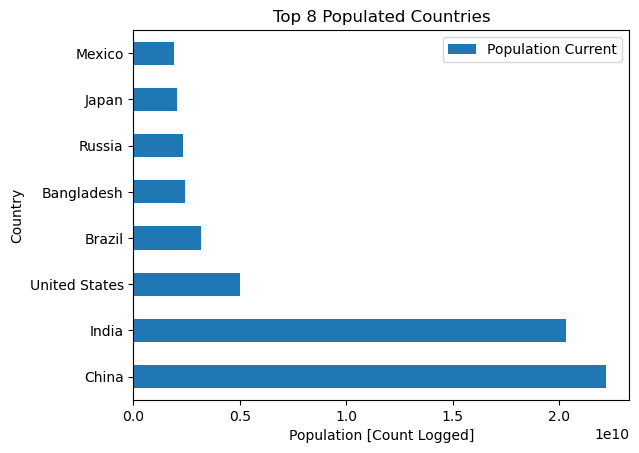

In [15]:
# Population of each country in 2020
pop = df[['Country','Population Current']].groupby(['Country']).sum().sort_values(by=['Population Current'],ascending=False)

# plot bar chart of top 8 countries
pop.head(8).plot.barh()

# label and show the plot
plt.xlabel('Population [Count Logged]')
plt.ylabel('Country')
plt.title('Top 8 Populated Countries')
plt.savefig(fname='../figures/top_populated_countries_barplot',format='png')
plt.show()

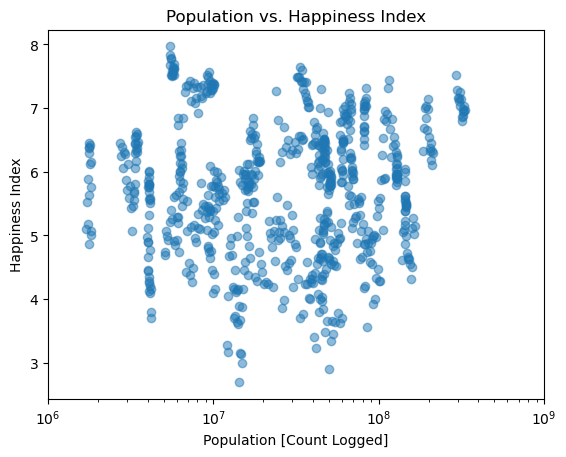

In [16]:
# create axis for logged scatter of GDP_per_capita
ax = plt.gca()

# create scatter plot and ticks
ax.scatter(df['Population Current'],df['Target Score'],alpha=.5)
ax.set_xscale('log')
ax.set_xticks([math.pow(10,6),math.pow(10,7),math.pow(10,8),math.pow(10,9)])
plt.xlim(math.pow(10,6),math.pow(10,9))

# label and show the plot
plt.xlabel('Population [Count Logged]')
plt.ylabel('Happiness Index')
plt.title('Population vs. Happiness Index')
plt.savefig(fname='../figures/population_vs_happiness_scatter',format='png')
plt.show()

**Barplot and Scatter Plot of Population:** The above plots illustrate the population feature, and its relationship to the target variable. The barplot shows the top 8 most populated countries. Meanwhile, the scatter plot indicates that population is not heavily correlated with the happiness index.

In [17]:
pop.describe()

,Population Current
count,4.700000e+01
mean,1.681906e+09
std,4.282842e+09
min,2.835966e+07
25%,1.564595e+08
50%,5.724357e+08
75%,1.148416e+09
max,2.219344e+10


<div class="alert alert-block alert-info">
    <b>Takeaway:</b> India, China, and the United States have the largest populations as of 2020. However, it does not appear on first examination that population is very correlated with the happiness index.  
  </div>

**Life Expectancy**

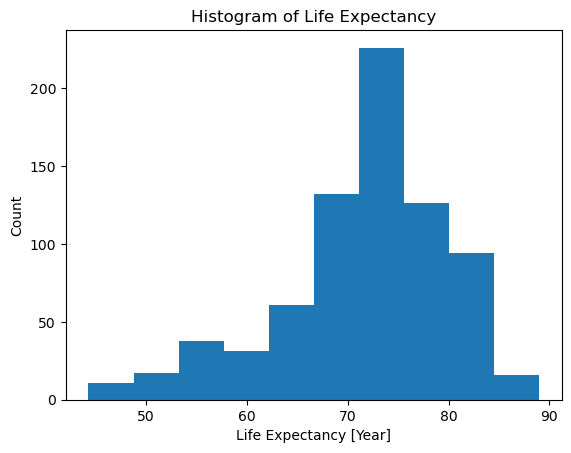

In [18]:
# explore life expectancy 
life = df['Life Ex Current']

# create histogram 
life.hist(grid=False)

# label and show the plot
plt.xlabel('Life Expectancy [Year]')
plt.ylabel('Count')
plt.title('Histogram of Life Expectancy')
plt.savefig(fname='../figures/life_expectancy_histogram',format='png')
plt.show()

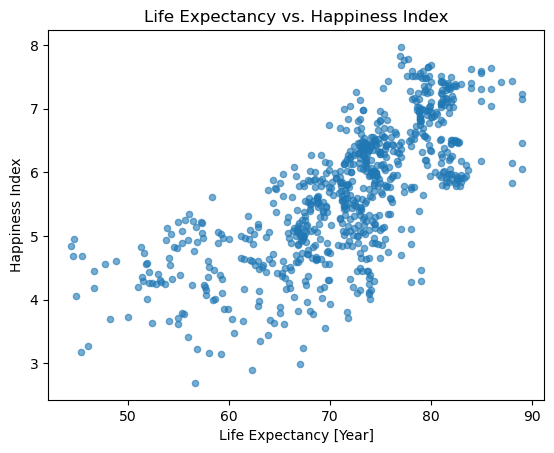

In [19]:
# scatter plot of life vs. happiness
df.plot.scatter('Life Ex Current','Target Score',alpha=0.6)

# label and show the plot
plt.xlabel('Life Expectancy [Year]')
plt.ylabel('Happiness Index')
plt.title('Life Expectancy vs. Happiness Index')
plt.savefig(fname='../figures/life_expectancy_vs_happiness_scatter',format='png')

plt.show()

**Histogram and Scatter Plot of Life Expectancy:** The above plots show the distribution of life expectancy and its relationship with the target variable. The distribution has a slight leftward skew, indicating that more countries have higher life expectancies than lower ones. Additionally, the scatter plot shows that there is a positive correlation between life expectancy and the happiness index. Therefore, it is expected that citizens who are living longer tend to be happier overtime. 

<div class="alert alert-block alert-info">
    <b>Takeaway:</b> The life expectancy feature is normally distributed throughout the 47 countries in this study. Additionally, the expected lifespan of a citizen living in a given country appears to be highly positively correlated with the happiness index. 
  </div>

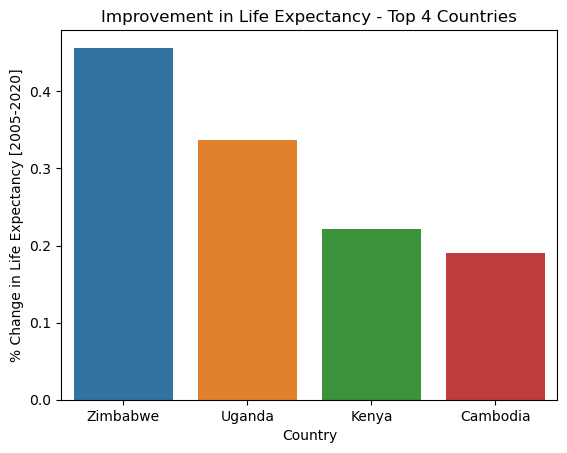

In [20]:
# dataframe for country and life ex
lc = df[['Country','Life Ex Current']]

# indexes to substract with 
i = 0
j = 15
delts = []
countries = df['Country'].unique()

# for every country, find the percent change of life ex from 2005-2020
for c in countries:
    change = lc.iloc[j,1]-lc.iloc[i,1]
    per = change / lc.iloc[i,1]
    delts.append(per)
    i+=16
    j+=16

# create sorted and unsorted lists 
delts_unsort = []
for dlt in delts:
    delts_unsort.append(dlt)
delts.sort(reverse=True)

# find the indexes of the countries from the original list 
ind = []
top_five = delts[0:4]
for dlt in top_five:
    ind.append(delts_unsort.index(dlt))

# find the names of the top 4 countries 
per_country = []

for i in ind:
    per_country.append(countries[i])


# plot bar graph 
# plt.barh(per_country,top_five)
sns.barplot(y=top_five,x=per_country,orient='v')
# label and show 
plt.ylabel("% Change in Life Expectancy [2005-2020]")  # add X-axis label
plt.xlabel("Country")  # add Y-axis label
plt.title("Improvement in Life Expectancy - Top 4 Countries")  # add title
plt.savefig(fname='../figures/top_countries_%_life_exp',format='png')
plt.show()

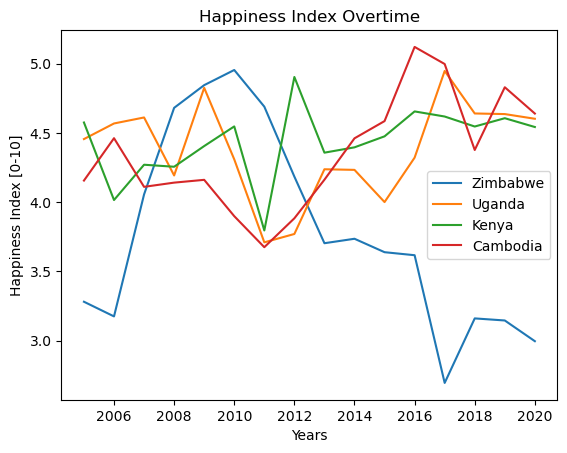

In [21]:
x = [2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
lines = ['Target Score','Life Ex Current','GDP Current']

for c in per_country:
    y = df.loc[df['Country']==c,df.columns=='Target Score']

    plt.plot(x, y)
    

# label and show 
plt.xlabel("Years")  # add X-axis label
plt.ylabel("Happiness Index [0-10]")  # add Y-axis label
plt.title("Happiness Index Overtime")  # add title
plt.savefig(fname='../figures/happiness_overtime',format='png')
plt.legend(per_country)
plt.show()


**Barplot and Line Graph of Countries with the greatest increase in Life Expectancy:** The barplot shows the top four countries that had significant increases in life expectancy from 2005 to 2020. Zimbabwe had the greatest improvement in life expectancy, with a percent change of almost 50%. The line graph above displays these countries' changes in the happiness index over this same time. It is interesting to note that Zimbabwe had an overall decrease in happiness, despite its remarkable increase in the life expectancy of its citizens.

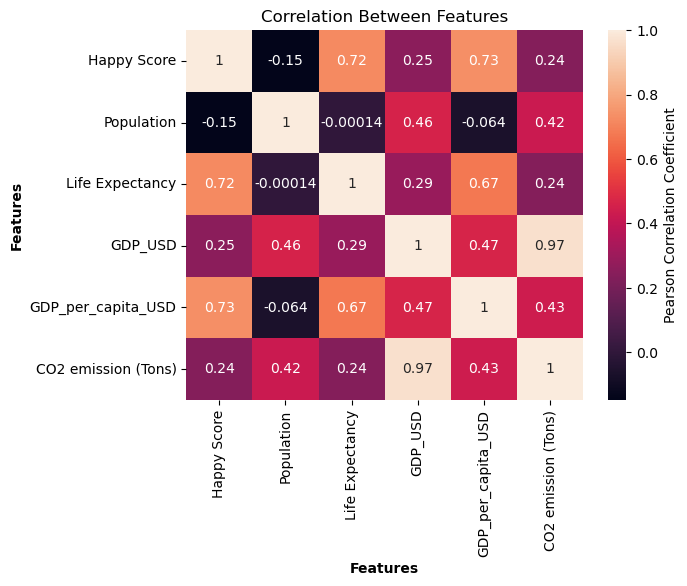

In [22]:
# create feature matrix
df_unlagged = pd.read_csv('../data/happiness.csv')
df_unlagged.drop(['Unnamed: 0','Country','Year'],axis=1,inplace=True)

# create correlations between features 
pear_corr = df_unlagged.corr(method='pearson')
sns.heatmap(pear_corr, annot=True, cbar_kws={'label': 'Pearson Correlation Coefficient'})

# plot
plt.title('Correlation Between Features')
plt.xlabel('Features',weight='bold')
plt.ylabel('Features',weight='bold')
plt.savefig(fname='../figures/feature_correlation_coefficients',format='png')
plt.show()

**Pearson Correlation Coefficients Explanation:** The above heatmap illustrates the correlation coefficients between each of the feature variables and the target variable. As indicted by the colorbar, the coefficients range from -1 (highly inversely correlated) to 1 (highly positively correlated). The diagonal of the heatmap shows intuitively that each of the variables are highly positively correlated with themselves. There is also a a strong correlation between GDP and CO2 emissions. This relationship was also demonstrated in the separate analysis of CO2 and GDP, which showed that the top 5 largest economies were also the top 5 CO2 emittors in 2020. Life Expectancy and GDP-per-capita are both highly positively correlated with the target variable. It is interesting to see that GDP-per-capita is highly correlated with the target, while GDP is not as correlated. This analysis confirms our initial findings in the scatter plots of GDP and GDP-per-capita, which showed that GDP-per-capita explained more of the variance in the happiness index across countries. 

<h2>Splitting Data: Groupped by Year of Target Index</h2>

In [23]:
# function for dropping unusable years from each dataframe
def drop_years(df,year):

    i = 0
    before_year = []

    for row in df['Target Year']:
        if row < year:
            before_year.append(i)
        i+=1

    df_for_splitting = df.drop(before_year)
    df_for_splitting.reset_index(inplace=True)
    df_for_splitting.drop(['index'],axis=1,inplace=True)
    
    return df_for_splitting

<h2>Import all Lagged Dataframes</h2>

In [24]:
# lag1 dataframe 
df1 = pd.read_csv('../data/happiness_lagged1.csv')
df1.drop(['Unnamed: 0'],axis=1,inplace=True)
# lag2 dataframe 
df2 = pd.read_csv('../data/happiness_lagged2.csv')
df2.drop(['Unnamed: 0'],axis=1,inplace=True)
# lag4 dataframe 
df4 = pd.read_csv('../data/happiness_lagged4.csv')
df4.drop(['Unnamed: 0'],axis=1,inplace=True)
# lag5 dataframe
df5 = pd.read_csv('../data/happiness_lagged5.csv')
df5.drop(['Unnamed: 0'],axis=1,inplace=True)

In [25]:
df1_split = drop_years(df1,2006)
df2_split = drop_years(df2,2007)
df3_split = drop_years(df,2008)
df4_split = drop_years(df4,2009)
df5_split = drop_years(df5,2010)

<h3>Lag 1: Train, Val, Test</h3>

In [26]:
# create training set - 2008-2015
df_train = df1_split.loc[df1_split['Target Year']<=2015]

y_train = df_train['Target Score']
X_train = df_train.loc[:,df_train.columns!='Target Score']

# create validation set - 2016-2017
df_val = df1_split.loc[((df1_split['Target Year']==2016) |
                               (df1_split['Target Year']==2017))]

y_val = df_val['Target Score']
X_val = df_val.loc[:,df_val.columns!='Target Score']

# create test set - 2018-2020
df_test = df1_split.loc[df1_split['Target Year']>2017]
    
y_test = df_test['Target Score']
X_test = df_test.loc[:,df_test.columns!='Target Score']

# save train, validation, and test sets to csvs
other_list = [X_train,X_val]

# create and save a X_other dataframe to be used in the ml algo
df_other = pd.concat(other_list)
df_other.to_csv('../data/X1_other.csv',sep=',')
print('X_other dataframe size:',df_other.shape)

# save a X_test dataframe to be used in test our ml algos
X_test.to_csv('../data/X1_test.csv',sep=',')
print('X_test dataframe size:',X_test.shape)

# save y_other and y_test sets to be used in ml algos 
y_other = pd.concat([y_train, y_val])
y_other.to_csv('../data/y1_other.csv',sep=',')
print('y_other dataframe size:',y_other.shape)

y_test.to_csv('../data/y1_test.csv',sep=',')
print('y_test dataframe size:',y_test.shape)

X_other dataframe size: (564, 13)
X_test dataframe size: (141, 13)
y_other dataframe size: (564,)
y_test dataframe size: (141,)


<h3>Lag 2: Train, Val, Test</h3>

In [27]:
# create training set - 2008-2015
df_train = df2_split.loc[df2_split['Target Year']<=2015]

y_train = df_train['Target Score']
X_train = df_train.loc[:,df_train.columns!='Target Score']

# create validation set - 2016-2017
df_val = df2_split.loc[((df2_split['Target Year']==2016) |
                               (df2_split['Target Year']==2017))]

y_val = df_val['Target Score']
X_val = df_val.loc[:,df_val.columns!='Target Score']

# create test set - 2018-2020
df_test = df2_split.loc[df2_split['Target Year']>2017]
    
y_test = df_test['Target Score']
X_test = df_test.loc[:,df_test.columns!='Target Score']

# save train, validation, and test sets to csvs
other_list = [X_train,X_val]

# create and save a X_other dataframe to be used in the ml algo
df_other = pd.concat(other_list)
df_other.to_csv('../data/X2_other.csv',sep=',')
print('X_other dataframe size:',df_other.shape)

# save a X_test dataframe to be used in test our ml algos
X_test.to_csv('../data/X2_test.csv',sep=',')
print('X_test dataframe size:',X_test.shape)

# save y_other and y_test sets to be used in ml algos 
y_other = pd.concat([y_train, y_val])
y_other.to_csv('../data/y2_other.csv',sep=',')
print('y_other dataframe size:',y_other.shape)

y_test.to_csv('../data/y2_test.csv',sep=',')
print('y_test dataframe size:',y_test.shape)

X_other dataframe size: (517, 19)
X_test dataframe size: (141, 19)
y_other dataframe size: (517,)
y_test dataframe size: (141,)


<h3>Lag 3: Train, Val, Test</h3>

In [28]:
# create training set - 2008-2015
df_train = df3_split.loc[df3_split['Target Year']<=2015]

y_train = df_train['Target Score']
X_train = df_train.loc[:,df_train.columns!='Target Score']

# create validation set - 2016-2017
df_val = df3_split.loc[((df3_split['Target Year']==2016) |
                               (df3_split['Target Year']==2017))]

y_val = df_val['Target Score']
X_val = df_val.loc[:,df_val.columns!='Target Score']

# create test set - 2018-2020
df_test = df3_split.loc[df3_split['Target Year']>2017]
    
y_test = df_test['Target Score']
X_test = df_test.loc[:,df_test.columns!='Target Score']

# save train, validation, and test sets to csvs
other_list = [X_train,X_val]

# create and save a X_other dataframe to be used in the ml algo
df_other = pd.concat(other_list)
df_other.to_csv('../data/X3_other.csv',sep=',')
print('X_other dataframe size:',df_other.shape)

# save a X_test dataframe to be used in test our ml algos
X_test.to_csv('../data/X3_test.csv',sep=',')
print('X_test dataframe size:',X_test.shape)

# save y_other and y_test sets to be used in ml algos 
y_other = pd.concat([y_train, y_val])
y_other.to_csv('../data/y3_other.csv',sep=',')
print('y_other dataframe size:',y_other.shape)

y_test.to_csv('../data/y3_test.csv',sep=',')
print('y_test dataframe size:',y_test.shape)

# # check each sets size and year domains 
# print('Number of datapoints in training set:', X_train.shape[0])
# print('Percent of data in training set: {0:1.1f}'.format((X_train.shape[0]/df_for_splitting.shape[0])*100),)
# print('Years covered in training set:',X_train['Target Year'].unique())

# print('\nNumber of datapoints in validation set:', X_val.shape[0])
# print('Percent of data in validation set: {0:1.1f}'.format((X_val.shape[0]/df_for_splitting.shape[0])*100),)
# print('Years covered in validation set:',X_val['Target Year'].unique())

# print('\nNumber of datapoints in test set:', X_test.shape[0])
# print('Percent of data in test set: {0:1.1f}'.format((X_test.shape[0]/df_for_splitting.shape[0])*100),)
# print('Years covered in test set:',X_test['Target Year'].unique())


X_other dataframe size: (470, 25)
X_test dataframe size: (141, 25)
y_other dataframe size: (470,)
y_test dataframe size: (141,)


<h3>Lag 4: Train, Val, Test</h3>

In [29]:
# create training set - 2008-2015
df_train = df4_split.loc[df4_split['Target Year']<=2015]

y_train = df_train['Target Score']
X_train = df_train.loc[:,df_train.columns!='Target Score']

# create validation set - 2016-2017
df_val = df4_split.loc[((df4_split['Target Year']==2016) |
                               (df4_split['Target Year']==2017))]

y_val = df_val['Target Score']
X_val = df_val.loc[:,df_val.columns!='Target Score']

# create test set - 2018-2020
df_test = df4_split.loc[df4_split['Target Year']>2017]
    
y_test = df_test['Target Score']
X_test = df_test.loc[:,df_test.columns!='Target Score']

# save train, validation, and test sets to csvs
other_list = [X_train,X_val]

# create and save a X_other dataframe to be used in the ml algo
df_other = pd.concat(other_list)
df_other.to_csv('../data/X4_other.csv',sep=',')
print('X_other dataframe size:',df_other.shape)

# save a X_test dataframe to be used in test our ml algos
X_test.to_csv('../data/X4_test.csv',sep=',')
print('X_test dataframe size:',X_test.shape)

# save y_other and y_test sets to be used in ml algos 
y_other = pd.concat([y_train, y_val])
y_other.to_csv('../data/y4_other.csv',sep=',')
print('y_other dataframe size:',y_other.shape)

y_test.to_csv('../data/y4_test.csv',sep=',')
print('y_test dataframe size:',y_test.shape)

X_other dataframe size: (423, 31)
X_test dataframe size: (141, 31)
y_other dataframe size: (423,)
y_test dataframe size: (141,)


<h3>Lag 5: Train, Val, Test</h3>

In [30]:
# create training set - 2008-2015
df_train = df5_split.loc[df5_split['Target Year']<=2015]

y_train = df_train['Target Score']
X_train = df_train.loc[:,df_train.columns!='Target Score']

# create validation set - 2016-2017
df_val = df5_split.loc[((df5_split['Target Year']==2016) |
                               (df5_split['Target Year']==2017))]

y_val = df_val['Target Score']
X_val = df_val.loc[:,df_val.columns!='Target Score']

# create test set - 2018-2020
df_test = df5_split.loc[df5_split['Target Year']>2017]
    
y_test = df_test['Target Score']
X_test = df_test.loc[:,df_test.columns!='Target Score']

# save train, validation, and test sets to csvs
other_list = [X_train,X_val]

# create and save a X_other dataframe to be used in the ml algo
df_other = pd.concat(other_list)
df_other.to_csv('../data/X5_other.csv',sep=',')
print('X_other dataframe size:',df_other.shape)

# save a X_test dataframe to be used in test our ml algos
X_test.to_csv('../data/X5_test.csv',sep=',')
print('X_test dataframe size:',X_test.shape)

# save y_other and y_test sets to be used in ml algos 
y_other = pd.concat([y_train, y_val])
y_other.to_csv('../data/y5_other.csv',sep=',')
print('y_other dataframe size:',y_other.shape)

y_test.to_csv('../data/y5_test.csv',sep=',')
print('y_test dataframe size:',y_test.shape)

X_other dataframe size: (376, 37)
X_test dataframe size: (141, 37)
y_other dataframe size: (376,)
y_test dataframe size: (141,)


In [91]:
df5

,Country,Target Year,Target Score,Population lag 5 years,Population lag 4 years,Population lag 3 years,Population lag 2 years,Population lag 1 year,Population Current,Life Ex lag 5 years,...,CO2 lag 4 years,CO2 lag 3 years,CO2 lag 2 years,CO2 lag 1 year,CO2 Current,Happy lag 5 years,Happy lag 4 years,Happy lag 3 years,Happy lag 2 years,Happy lag 1 year
0,Argentina,2005,6.073158,NaN,NaN,NaN,NaN,NaN,38892924.0,NaN,...,NaN,NaN,NaN,NaN,5.690960e+09,NaN,NaN,NaN,NaN,NaN
1,Argentina,2006,5.961034,NaN,NaN,NaN,NaN,38892924.0,39289876.0,NaN,...,NaN,NaN,NaN,5.690960e+09,5.865569e+09,NaN,NaN,NaN,NaN,6.073158
2,Argentina,2007,6.424133,NaN,NaN,NaN,38892924.0,39289876.0,39684303.0,NaN,...,NaN,NaN,5.690960e+09,5.865569e+09,6.039814e+09,NaN,NaN,NaN,6.073158,5.961034
3,Argentina,2008,6.441067,NaN,NaN,38892924.0,39289876.0,39684303.0,40080159.0,NaN,...,NaN,5.690960e+09,5.865569e+09,6.039814e+09,6.227920e+09,NaN,NaN,6.073158,5.961034,6.424133
4,Argentina,2009,6.775805,NaN,38892924.0,39289876.0,39684303.0,40080159.0,40482786.0,NaN,...,5.690960e+09,5.865569e+09,6.039814e+09,6.227920e+09,6.406870e+09,NaN,6.073158,5.961034,6.424133,6.441067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,Zimbabwe,2016,3.616480,12894323.0,13115149.0,13350378.0,13586710.0,13814642.0,14030338.0,45.4,...,6.897617e+08,7.015980e+08,7.135037e+08,7.257295e+08,7.364670e+08,4.690188,4.184451,3.703191,3.735400,3.638300
748,Zimbabwe,2017,2.693523,13115149.0,13350378.0,13586710.0,13814642.0,14030338.0,14236599.0,46.6,...,7.015980e+08,7.135037e+08,7.257295e+08,7.364670e+08,7.460487e+08,4.184451,3.703191,3.735400,3.638300,3.616480
749,Zimbabwe,2018,3.159802,13350378.0,13586710.0,13814642.0,14030338.0,14236599.0,14438812.0,48.2,...,7.135037e+08,7.257295e+08,7.364670e+08,7.460487e+08,7.579030e+08,3.703191,3.735400,3.638300,3.616480,2.693523
750,Zimbabwe,2019,3.144800,13586710.0,13814642.0,14030338.0,14236599.0,14438812.0,14645473.0,50.0,...,7.257295e+08,7.364670e+08,7.460487e+08,7.579030e+08,7.688521e+08,3.735400,3.638300,3.616480,2.693523,3.159802


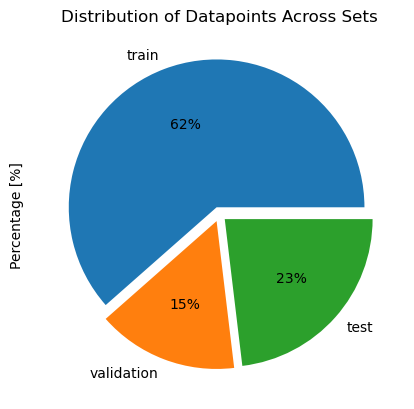

In [32]:
# create dataframe of countries and their co2 emissions 
dict_sets = pd.DataFrame({'set':['train','validation','test'],
                          'Percentage [%]':[61.5,15.4,23.1]})
#     'train':[61.5],'validation':[15.4],'test':[23.1]})

# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05, 0.05)

# plot pie chart of the top 5 emittors 
dict_sets.plot(kind='pie',labels=['train','validation','test'],y='Percentage [%]',autopct='%1.0f%%',
               legend=False,explode=explode)

# label and show the plot
plt.title('Distribution of Datapoints Across Sets')
plt.savefig(fname='../figures/distribution_of_datapoints',format='png')
plt.show()

<h2>Preprocessing: OneHotEncoder and StandardScaler</h2>

Note that the preprocessing is now done within the CV algorithm. The below is a demonstration of the preprocessing completed on the 3 year lagged dataset.

**OneHotEncoder: Country**

In [ ]:
# Apply OHE to the dataset to transform the country feature
from sklearn.preprocessing import OneHotEncoder

# Create list of categories to transform 
onehot_ftrs = ['Country']
# initialize the encoder
enc = OneHotEncoder(sparse=False,handle_unknown='ignore') 
# fit the training data
enc.fit(X_train[onehot_ftrs])
# print('feature names:',enc.get_feature_names(onehot_ftrs))

# transform X_train using OHE
onehot_train = enc.transform(X_train[onehot_ftrs])
print('transformed train features:')
print(onehot_train)
print('Dimensions of hot-encoded training set:',onehot_train.shape)

# transform X_val
onehot_val = enc.transform(X_val[onehot_ftrs])
print('\ntransformed val features:')
print(onehot_val)
print('Dimensions of hot-encoded validation set:',onehot_val.shape)

# transform X_test
onehot_test = enc.transform(X_test[onehot_ftrs])
print('\ntransformed test features:')
print(onehot_test)
print('Dimensions of hot-encoded test set:',onehot_test.shape)


**StandardScaler: Year, Population, Life Expectancy, GDP, GDP-per-capita, CO2 Emissions, Happiness Index**

In [ ]:
# Perform StandardScaler on Continuous Features
from sklearn.preprocessing import StandardScaler

# columns for standardscaling preprocessing
std_ftrs = ['Target Year', 'Population lag 3 years',
       'Population lag 2 years', 'Population lag 1 year', 'Population Current',
       'Life Ex lag 3 years', 'Life Ex lag 2 years', 'Life Ex lag 1 year',
       'Life Ex Current', 'GDP lag 3 years', 'GDP lag 2 years',
       'GDP lag 1 year', 'GDP Current', 'GDP_cap lag 3 years',
       'GDP_cap lag 2 years', 'GDP_cap lag 1 year', 'GDP_cap Current',
       'CO2 lag 3 years', 'CO2 lag 2 years', 'CO2 lag 1 year', 'CO2 Current',
       'Happy lag 3 years', 'Happy lag 2 years', 'Happy lag 1 year']

# initialize the scaler 
scaler = StandardScaler()

# fit train set and transform all sets with the scaler 
std_train = scaler.fit_transform(X_train[std_ftrs])
std_val = scaler.transform(X_val[std_ftrs])
std_test = scaler.transform(X_test[std_ftrs])


print('Dimensions of standardized train set:',std_train.shape)
print('Dimensions of standardized validation set:', std_val.shape)
print('Dimensions of standardized test set:', std_test.shape)

**Merge Scaled and OneHotEncoded Features**

In [ ]:
# convert numpy arrays into dataframes for merging 
df_std_train = pd.DataFrame(std_train, columns=std_ftrs)
df_std_val = pd.DataFrame(std_val, columns=std_ftrs)
df_std_test = pd.DataFrame(std_test, columns=std_ftrs)

df_onehot_train = pd.DataFrame(onehot_train, columns=countries)
df_onehot_val = pd.DataFrame(onehot_val, columns=countries)
df_onehot_test = pd.DataFrame(onehot_test, columns=countries)

X_train = df_std_train.join(df_onehot_train)
X_val = df_std_val.join(df_onehot_val)
X_test = df_std_test.join(df_onehot_test)

print('Number of datapoints in preprocessed train set:', X_train.shape[0])
print('Number of features in preprocessed train set:', X_train.shape[1])
print('\nNumber of datapoints in preprocessed validation set:', X_val.shape[0])
print('Number of features in preprocessed validation set:', X_val.shape[1])
print('\nNumber of datapoints in preprocessed test set:', X_test.shape[0])
print('Number of features in preprocessed test set:', X_test.shape[1])

X_train.head()